# 🧠 Post Analysis & Machine Learning Model for Categorization and Recommendation

In this project, we analyze a collection of diverse social media or blog-style posts, each containing a title, message, and sometimes a predefined category. The primary goal is to **develop a machine learning model that can intelligently categorize new, uncategorized posts** based on their content and also **recommend similar posts to users based on their interests**.

---

### 🔍 Project Objectives:

1. **Automatic Post Categorization:**
   - Many posts lack explicit categories.
   - We train a classification model that learns from the labeled posts and can **predict appropriate categories** for unlabeled ones.
   - Example: A post about a product launch might be automatically classified under **"Promotion"** or **"Marketing Tips"**.

2. **Content-Based Recommendation System:**
   - Using NLP techniques (like TF-IDF or transformer embeddings), we calculate the similarity between posts.
   - Based on a user’s interest (e.g., if someone follows **"Marketing Tips"**), we recommend them other relevant content, such as posts under **"Promotion"**, **"Business Insights"**, or **"Consultation"**.

3. **Enhanced User Experience:**
   - This system can be integrated into platforms like blogs, forums, or community dashboards.
   - Users receive **personalized recommendations** and **cleanly organized content**, making the experience smarter and more engaging.

---

### 🛠️ Technical Approach:

- **Text Preprocessing:** Remove emojis, tokenize text, remove stopwords, and lemmatize.
- **Feature Extraction:** Use TF-IDF vectors or embeddings (e.g., Sentence Transformers or BERT).
- **Model Training:** Train a multi-class classifier (e.g., Logistic Regression, Naive Bayes, SVM, or fine-tuned BERT).
- **Similarity Computation:** Cosine similarity or embedding-based ranking for recommendations.
- **Evaluation:** Use precision, recall, F1-score for categorization; use recall@k and NDCG for recommendation evaluation.

---

### 📈 Future Enhancements:

- Include user profiles and behavior logs to build hybrid recommendation systems.
- Expand categories dynamically using unsupervised clustering.
- Train on multilingual content for broader reach.

### 📌 Code Explanation (Post Categorization Setup)

```python
import pandas as pd
```
- Imports **Pandas** for data handling.

---

#### 🗂️ 1. Category Metadata:
```python
category_data = { ... }
```
- A dictionary maps each category to:
  - A **template** (example text with emoji).
  - An **icon** (Font Awesome class name).

```python
catalog_df = pd.DataFrame([...])
```
- Converts the category data into a structured **DataFrame** for easy reference.

---

#### 📝 2. Posts Data:
```python
posts = [ ... ]
```
- A list of **full-length sample posts**, with or without categories.
- These simulate real-world posts for analysis and model training.

```python
posts_df = pd.DataFrame(posts, columns=["Category", "Post"])
```
- Stores the post data in a DataFrame with two columns: `Category` and `Post`.

---

#### 🖥️ 3. Display Previews:
```python
print("Posts DataFrame:")
print(posts_df)
print("Catalog DataFrame:")
print(catalog_df)
```
- Prints both datasets for review.

In [50]:
import pandas as pd

# Category -> Template & Icon mapping
category_data = {
    "Marketing Tips": ["🚀 Marketing Tips: Here we are marketing our product...", "FaBullhorn"],
    "Promotion": ["🎉 Promotion: Special discount offer! 50% off on all products...", "FaTag"],
    "Personal Portfolio": ["💼 Personal Portfolio: Showcasing my work...", "FaBriefcase"],
    "News Feed": ["📰 News Feed: Today's hot topic is about the latest tech trends...", "FaNewspaper"],
    "Photography": ["📸 Photography: Capturing beautiful moments in nature...", "FaCamera"],
    "Tech Innovations": ["⚙️ Tech Innovations: The latest trends in technology...", "FaCogs"],
    "Business Insights": ["📊 Business Insights: Market analysis, strategies...", "FaChartLine"],
    "Special Offers": ["🎁 Special Offers: Exclusive offers for our customers...", "FaGift"],
    "Consultation": ["💼 Consultation: Book a session to discuss strategies...", "FaBusinessTime"],
    "Community Event": ["🤝 Community Event: Join us for a local event...", "FaPeopleCarry"],
    "Food & Drink": ["🍽️ Food & Drink: My favorite recipes and reviews...", "FaUtensils"],
    "Gaming": ["🎮 Gaming: Top trending games, reviews, and tips...", "FaGamepad"],
    "Lifestyle": ["❤️ Lifestyle: Tips on living a healthy, balanced life...", "FaHeart"]
}

# Separate DataFrame to store the catalog (categories, icons, and templates)
catalog_df = pd.DataFrame([
    {"Category": cat, "Template": info[0], "Icon": info[1]}
    for cat, info in category_data.items()
])

# List of sample posts (some with categories, some missing)
posts = [
    ("Marketing Tips", "🚀 Discover the top digital marketing trends of the year, including AI-driven content strategies, personalized campaigns, and tips for increasing your brand's reach organically across social media platforms and email newsletters."),
    
    ("Promotion", "🎉 It's our biggest sale of the season! Get up to 50% off on selected items in-store and online. Don’t miss this chance to grab premium products at unbeatable prices. Offer valid till Sunday."),
    
    ("Personal Portfolio", "💼 Check out my redesigned personal portfolio, where I showcase my latest projects, coding skills, certifications, and blogs. It’s built using HTML, CSS, and JavaScript and is fully responsive for all devices."),
    
    ("News Feed", "📰 Breaking: Major tech giants are collaborating on an open-source AI initiative aimed at ensuring ethical advancements. The move is hailed as a game-changer for transparency and regulation in artificial intelligence."),
    
    ("Photography", "📸 Took a solo road trip across the coast and captured sunrise over cliffs, foggy hills, and golden beaches. These moments remind me how peaceful and powerful nature truly is."),
    
    ("Tech Innovations", "⚙️ Drones are now being used to deliver medicines to rural areas. With enhanced GPS tracking and real-time analytics, this innovation can drastically reduce emergency response time and save lives."),
    
    ("Business Insights", "📊 Our analysis of Q2 market behavior reveals a sharp rise in consumer spending on tech accessories and wellness goods. Retailers need to pivot their strategies to align with these evolving demands."),
    
    ("Special Offers", "🎁 We're giving early access to our new skincare collection! Get a free consultation and sample kit with every purchase above ₹999. Limited time only. Be the first to try our latest line."),
    
    ("Consultation", "💼 Need tailored advice to scale your business? Our experts offer one-on-one consultations in marketing, finance, and product strategy. Let’s turn your ideas into actionable steps that lead to growth."),
    
    ("Community Event", "🤝 We’re hosting a local startup mixer this Saturday! Meet fellow entrepreneurs, share your journey, and find collaboration opportunities. Free entry and snacks. All are welcome at the co-working café."),
    
    ("Food & Drink", "🍽️ Just found the best street food trail in the city! From spicy momos to creamy kulfi, each stall had a story to tell. Don’t miss this guide to hidden culinary gems."),
    
    ("Gaming", "🎮 Gamers, rejoice! The latest console update brings ultra-realistic visuals, 3D sound, and a performance boost. We also reviewed the top 5 multiplayer games for this month—get ready to level up!"),
    
    ("Lifestyle", "❤️ Embrace slow mornings with a 10-minute yoga stretch, a nutritious breakfast, and journaling. Creating a mindful routine has improved my productivity, mood, and energy levels throughout the day."),
    
    (None, "💡 Ever feel like ideas come at the strangest times? I was walking through the rain and suddenly solved a design problem I’d been stuck on for days. Creativity is wild."),
    
    (None, "🔍 I noticed how simple colors and soft fonts can entirely change a brand's feel. Just exploring ideas on how minimalism communicates more with less. Might try this on my next project."),
    
    (None, "🧠 Reflecting on how mindset influences learning. When I switched from “I can’t do this” to “I’m learning how to do this,” everything shifted. Failure turned into feedback. Growth is all about perspective."),
    
    ("Marketing Tips", "📈 A/B testing is a simple but powerful tool. Even small tweaks like button color or headline tone can significantly impact your conversion rate. Always test, measure, and improve."),
    
    ("Photography", "📷 Just finished editing a black-and-white portrait series that captures raw human emotions. Lighting and shadow play were crucial. Planning to exhibit them at the local art fair next month."),
    
    ("Business Insights", "📉 Supply chain issues are still impacting small retailers. Diversifying suppliers and integrating demand forecasting tools can make a difference. Our new guide walks you through practical steps for mitigation."),
    
    ("Lifestyle", "🛏️ Tried the 30-day digital detox challenge—reduced screen time, no social media after 8 PM, and replaced scrolling with reading. My sleep improved and so did my focus."),
    
    (None, "🧳 What if every month we picked one tiny habit to change—just one? Like drinking more water or walking after dinner. It might lead to a chain of positive shifts without overwhelming us."),
    
    (None, "✍️ Journaling one paragraph every night has helped me declutter my thoughts. It’s not about being profound—just honest. Amazing how clarity shows up when you least expect it."),
    
    ("Food & Drink", "🍹 Explored a rooftop café that serves fusion drinks using traditional Indian spices—cinnamon mojitos, cardamom lattes, and saffron lemonade. Highly recommend this cozy little gem for your next brunch."),
    
    ("Tech Innovations", "📡 SpaceX just launched a satellite to expand high-speed internet in underserved regions. With this initiative, remote education and healthcare might soon be accessible even in the most isolated locations.")
, ("Health & Fitness", "🏋️‍♀️ Just completed a 30-minute HIIT workout, and I feel amazing! These quick yet intense sessions really help me boost energy and mood throughout the day."),
    
    ("Travel", "✈️ Just booked my next adventure to Japan! I’m excited to explore Tokyo’s vibrant streets, taste authentic sushi, and experience the cherry blossoms in full bloom."),
    
    ("Technology", "📱 The new smartphone model features a foldable display and improved camera performance. Can’t wait to test it out and see how these advancements impact user experience."),
    
    ("Music", "🎶 The latest album from my favorite artist dropped today! The sound is experimental yet nostalgic, blending modern beats with classic instruments. Highly recommend giving it a listen."),
    
    ("Personal Growth", "🌱 Took some time to reflect on my progress this year. Small wins really add up, and it’s important to celebrate those victories, even if they seem minor."),
    
    ("Fitness Tips", "💪 Consistency is key! If you’re looking to build strength, make sure to track your workouts and progressively challenge yourself with heavier weights or more reps."),
    
    ("Fashion", "👗 Just bought a new summer dress that’s perfect for the warm weather! The lightweight fabric and vibrant colors make it perfect for any beach outing or outdoor event."),
    
    ("Education", "🎓 Enrolled in an online course on data science! Excited to dive deeper into Python, machine learning, and statistical analysis to enhance my career opportunities."),
    
    ("Parenting", "👶 Parenting is a journey of constant learning. From late-night feedings to teaching first words, the moments are precious and go by faster than you think."),
    
    ("Self-Care", "🛁 Took a long, relaxing bath with essential oils and soft music—just what I needed to unwind after a busy week. Self-care is such an important part of maintaining balance."),
    
    ("Environment", "🌍 Participating in a local beach clean-up today! It’s amazing how small actions can collectively make a big difference in preserving our planet."),
    
    ("Technology", "💻 Experimenting with the new AI-powered software that automates image editing. The results are mind-blowing—what took hours now takes mere minutes."),
    
    ("Fitness Motivation", "🏃‍♂️ Ran my first 5k today! I’m proud of how far I’ve come—just a few months ago, I couldn’t even run a mile. Keep pushing yourself to new limits."),
    
    ("Home Decor", "🏡 Just finished redesigning my living room with minimalistic furniture and earthy tones. The space now feels so calming and open, perfect for relaxation and creativity."),
    
    ("Gaming", "🎮 The new strategy game that just released has a unique combat system and story. I’ve been playing non-stop, and it’s quickly becoming one of my all-time favorites."),
    
    ("Cooking", "🍽️ Tried making a new pasta dish tonight! It’s a simple recipe with fresh tomatoes, garlic, and basil. The flavors are absolutely incredible—definitely adding this to my regular meal rotation."),
    
    ("Photography", "📷 Captured the golden hour at a local park. The light and shadows were just perfect for some stunning landscape shots."),
    
    ("Finance", "💵 Just set up my first investment portfolio with a mix of stocks and bonds. Feeling good about starting my journey toward financial independence."),
    
    ("Lifestyle", "🧘‍♂️ Took a 10-minute mindfulness meditation break in the middle of a hectic day. It was a much-needed reset and helped me refocus."),
    
    ("Technology", "🔌 Just upgraded my home office setup with a standing desk and dual monitor. My productivity has increased drastically—I highly recommend the change if you’re working from home."),
    
    ("Social Media", "📱 It’s so interesting to see how social media trends evolve. The new challenge where people recreate childhood photos has taken over my feed. It’s a fun and nostalgic way to connect."),
    
    ("Tech News", "💡 Major breakthrough in quantum computing! Researchers have developed a new algorithm that could revolutionize cryptography and data security. The future looks exciting."),
    
    ("Health", "🥗 I’ve started meal prepping for the week—getting a mix of proteins, veggies, and carbs ready for my busy schedule. It’s been a game-changer for staying on track with my nutrition."),
    
    ("Books", "📚 Finished reading an amazing sci-fi novel about time travel and alternate realities. The twist at the end was mind-blowing. Highly recommend it to anyone who loves a good plot twist."),
    
    ("Fashion", "👠 Just got these new boots—perfect for fall weather! They’re stylish and comfortable, and I can’t wait to wear them on my next trip to the city."),
    
    ("Work Tips", "🖥️ If you’re working remotely, try setting boundaries with your workspace. Having a dedicated work area, even if it’s just a small desk in the corner, helps maintain focus and productivity."),
    
    ("None", "🎨 Was experimenting with watercolors today, and I ended up painting a portrait of my cat. It’s been ages since I did something creative, and it felt so refreshing."),
    
    ("None", "🚶‍♀️ Sometimes the best ideas come during a long walk. I was strolling through the park, and suddenly, I figured out how to fix a bug in my code that had been bugging me for hours."),
    
    ("Food & Drink", "🍲 Tried a new recipe for homemade ramen last night—rich broth, tender noodles, and fresh toppings. It’s now my go-to comfort food."),
    
    ("Photography", "📸 Spent the afternoon capturing some stunning cityscapes. There’s something magical about the contrast between modern architecture and the golden hour light."),
    
    ("Fitness", "🧘‍♀️ Tried a new Pilates routine this morning. It was challenging but really helped me stretch out and strengthen my core. Can’t wait to make it a regular part of my routine."),
    
    ("Tech Trends", "🌐 The rise of virtual reality in education is fascinating. Some schools are now using VR to create immersive learning environments, making subjects like history and biology come to life."),
    
    ("None", "💬 I’ve been reflecting a lot lately on how the little things in life—like a smile from a stranger or a beautiful sunset—can make all the difference in your day."),
    
    ("Business", "📈 We’re seeing a shift in the market where consumers are valuing sustainability more than ever. Brands that prioritize eco-friendly practices are attracting a loyal customer base."),
    
    ("None", "💭 Sometimes I wonder how people from the past would perceive today’s technology. Would they be amazed or overwhelmed? The pace of change is mind-blowing."),
    
    ("Travel", "🌍 Planning a solo backpacking trip through Europe this summer. I’m excited to immerse myself in different cultures, try new foods, and explore hidden gems."),
    
    ("None", "🌸 Took some time today to admire the simple beauty of nature. The flowers, the birds, the breeze—it all made me appreciate the little things."),
    
    ("Lifestyle", "☕ Started the day with a hot cup of coffee and a good book. Sometimes, the most productive mornings begin with just a quiet moment to yourself."),
    
    ("Gaming", "🎮 Just unlocked a new level in my favorite RPG! The storyline is getting intense, and I’m on the edge of my seat for what happens next."),
    
    ("Marketing", "📊 Conducted a survey to better understand our target audience. The insights we gained are invaluable and will help us craft more personalized marketing campaigns."),
    
    ("None", "🌙 I’ve always been fascinated by the night sky. Last night, I spent hours stargazing, and I couldn’t help but wonder about the vastness of the universe."),
    
    ("Lifestyle", "🚴‍♂️ Took a bike ride around the city this morning. The weather was perfect, and it felt so good to get some fresh air and clear my mind."),
]

# Create posts DataFrame
posts_df = pd.DataFrame(posts, columns=["Category", "Post"])

# Preview both
print("📄 Posts DataFrame:")
print(posts_df)

print("\n📁 Catalog DataFrame:")
print(catalog_df)


📄 Posts DataFrame:
              Category                                               Post
0       Marketing Tips  🚀 Discover the top digital marketing trends of...
1            Promotion  🎉 It's our biggest sale of the season! Get up ...
2   Personal Portfolio  💼 Check out my redesigned personal portfolio, ...
3            News Feed  📰 Breaking: Major tech giants are collaboratin...
4          Photography  📸 Took a solo road trip across the coast and c...
..                 ...                                                ...
61           Lifestyle  ☕ Started the day with a hot cup of coffee and...
62              Gaming  🎮 Just unlocked a new level in my favorite RPG...
63           Marketing  📊 Conducted a survey to better understand our ...
64                None  🌙 I’ve always been fascinated by the night sky...
65           Lifestyle  🚴‍♂️ Took a bike ride around the city this mor...

[66 rows x 2 columns]

📁 Catalog DataFrame:
              Category                          

### **Explanation:**

1. **Data Preparation**: 
   - Replaces missing categories with "Uncategorized".
   - Counts the number of posts per category.
   - Merges with the `catalog_df` to retrieve additional metadata like templates.

2. **Plotting**: 
   - The pie chart shows the distribution of blog posts by category.
   - The bar chart represents the count of posts per category, sorted by count.

3. **Saving Plots**:
   - Saves two versions of the figure:
     - `blog_post_distribution_normal.png` with a regular background.
     - `blog_post_distribution_transparent.png` with a transparent background.

4. **Layout Adjustments**:
   - `tight_layout(pad=4)` ensures there is space between the pie and bar charts.

### **File Saving:**
The plots are saved in the `Plots` directory, and if the directory doesn't exist, it is created before saving.

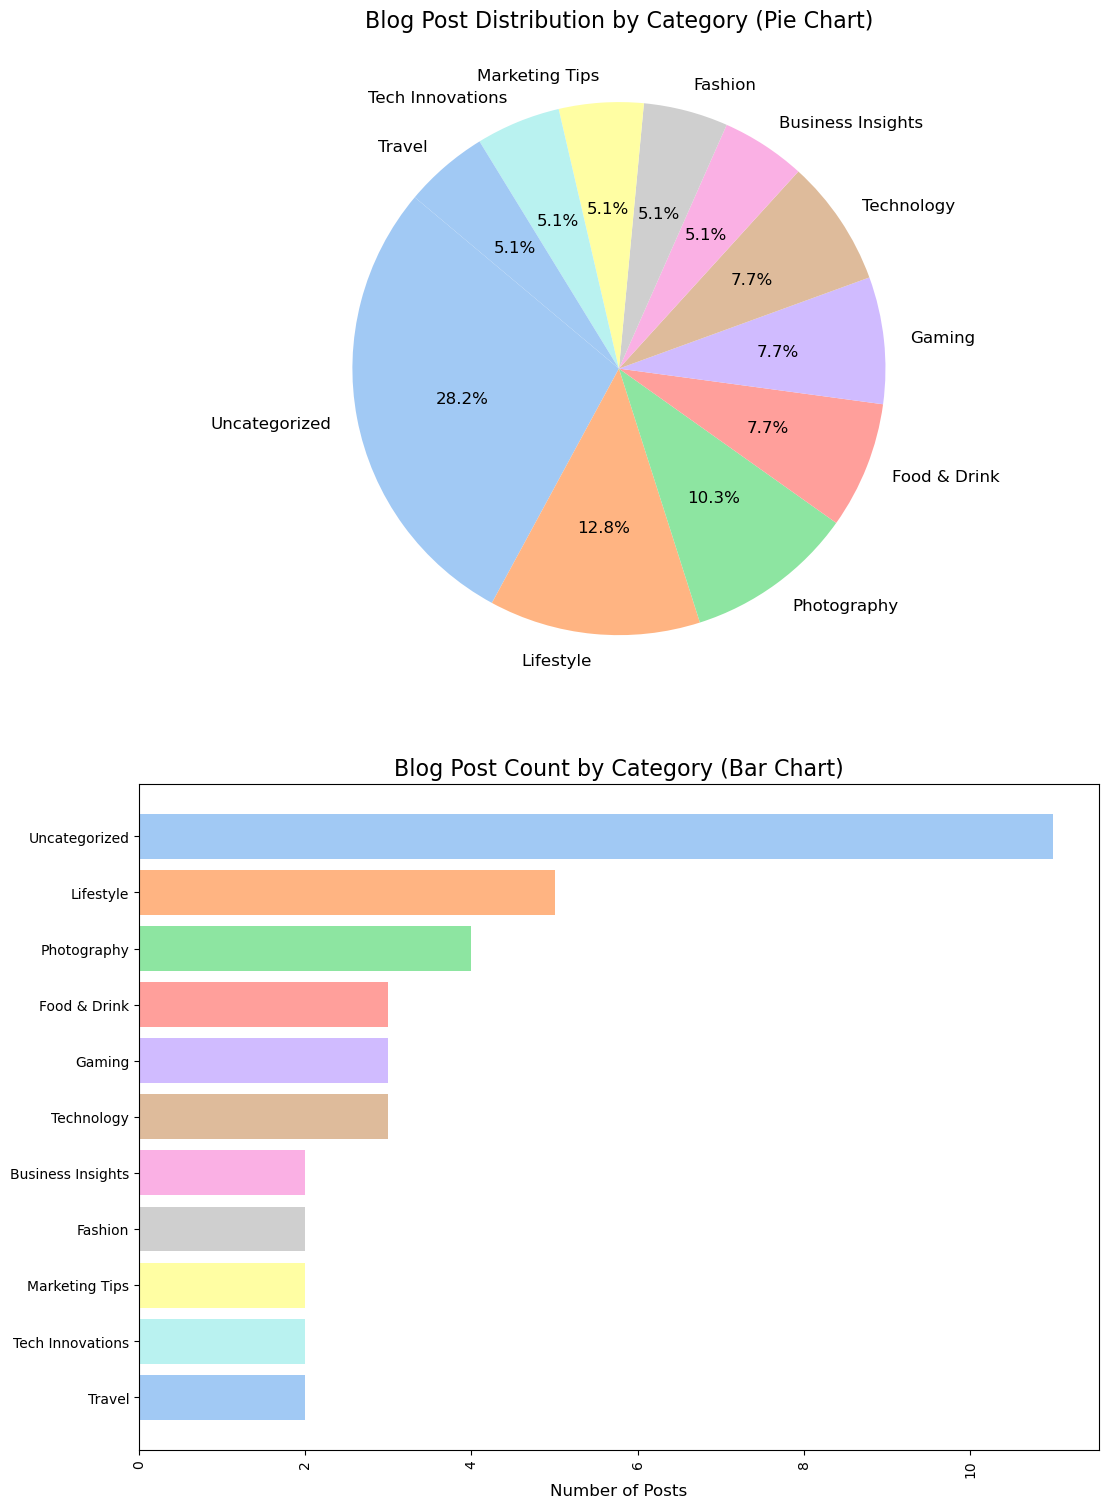

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

# ----------------------------------
# 🧹 Step 1: Clean and Prepare Data
# ----------------------------------

# Replace missing categories and None values with "Uncategorized"
posts_df['Category'] = posts_df['Category'].fillna("Uncategorized").replace({"None": "Uncategorized"})

# Count number of posts per category
post_counts = posts_df['Category'].value_counts().reset_index()
post_counts.columns = ['Category', 'Count']

# Merge with catalog to get category metadata
merged_df = pd.merge(post_counts, catalog_df, on='Category', how='left')

# Handle missing templates
merged_df['Template'] = merged_df['Template'].fillna("Uncategorized: No details.")

# Assign a unique pastel color to each category
colors = sns.color_palette("pastel", len(merged_df))

# ----------------------------------
# 📈 Step 2: Plot Pie Chart
# ----------------------------------

# Group smaller slices into "Others"
threshold = 2  # threshold for percentage below which categories will be grouped into "Others"
merged_df['Percent'] = (merged_df['Count'] / merged_df['Count'].sum()) * 100
merged_df['Category'] = merged_df.apply(
    lambda row: row['Category'] if row['Percent'] > threshold else 'Others', axis=1
)

# Recount categories after grouping small slices and remove "Others"
post_counts_grouped = merged_df.groupby('Category')['Count'].sum().reset_index()
post_counts_grouped = post_counts_grouped[post_counts_grouped['Category'] != 'Others']  # Remove "Others"
post_counts_grouped = post_counts_grouped.sort_values(by='Count', ascending=False)

# Update the color palette and assign for the new grouped data
colors = sns.color_palette("pastel", len(post_counts_grouped))

# Plotting the Pie Chart
plt.figure(figsize=(12, 16))  # Taller figure to fit both plots

# --- Pie Chart at top ---
plt.subplot(2, 1, 1)  # (rows, cols, index)
plt.pie(
    post_counts_grouped['Count'],
    labels=post_counts_grouped['Category'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Blog Post Distribution by Category (Pie Chart)", fontsize=16)

# ----------------------------------
# 📊 Step 3: Plot Bar Chart
# ----------------------------------

# Sort categories for bar chart (optional)
post_counts_grouped = post_counts_grouped.sort_values(by='Count', ascending=False)

plt.subplot(2, 1, 2)  # Next plot
bars = plt.barh(
    post_counts_grouped['Category'],
    post_counts_grouped['Count'],
    color=colors
)
plt.xlabel("Number of Posts", fontsize=12)
plt.title("Blog Post Count by Category (Bar Chart)", fontsize=16)
plt.gca().invert_yaxis()  # Highest bar at top

# Rotate the bar chart labels at 90 degrees
plt.xticks(rotation=90)

# ----------------------------------
# 🖼️ Save Plots
# ----------------------------------

# Create a directory to save plots if it doesn't exist
if not os.path.exists('Plots'):
    os.makedirs('Plots')

# Save the figure as a PNG with a normal background
plt.savefig('Plots/blog_post_distribution_normal.png')

# Save the figure with a transparent background
plt.savefig('Plots/blog_post_distribution_transparent.png', transparent=True)

# ----------------------------------
# 🖼️ Final Touches
# ----------------------------------

plt.tight_layout(pad=4)  # Space between pie and bar chart
plt.show()

## Ml Model Creation

To create a machine learning model that categorizes uncategorized posts based on their content, we'll follow these steps:

### **Steps Overview:**
1. **Data Preprocessing**:
   - Clean and process the data, particularly focusing on uncategorized posts.
   - Prepare the features (e.g., text from posts) and labels (existing categories).

2. **Model Training**:
   - Use a text classification model to categorize the uncategorized posts based on the existing categories.
   - We'll employ a TF-IDF vectorizer and a simple classifier (e.g., Random Forest or Logistic Regression).

3. **Prediction**:
   - Predict the categories for uncategorized posts.

4. **Results and Visualization**:
   - Show the results of the model and visualize the prediction distribution using a bar chart.

5. **Save Plots and Model**:
   - Save the model and the results in appropriate files for later use.

### **Explanation:**

1. **Data Preprocessing**:
   - We filter out uncategorized posts and split the data into training and testing sets.
   - We use the text of the posts to predict the categories. This is done by transforming the text into numerical features using **TF-IDF vectorization**.

2. **Model Training**:
   - We use a **Random Forest Classifier** for training. It’s an ensemble model that generally performs well for classification tasks. The classifier is trained using the text data transformed via the TF-IDF vectorizer.

3. **Prediction**:
   - The model predicts categories for the previously uncategorized posts based on the trained model.

4. **Visualization**:
   - The **bar plot** shows the distribution of predicted categories for uncategorized posts. This provides insight into how well the model is performing and the distribution of the categories.

5. **Evaluation**:
   - The model's **accuracy** is calculated based on the training data, and a **classification report** (precision, recall, f1-score) is generated for further analysis.

6. **Saving Model**:
   - The trained **model** and **vectorizer** are saved using `joblib` for later use.
   - A **CSV file** of the uncategorized posts with their predicted categories is saved, so you can review the predictions.

### **Files Saved**:
1. **Predicted Categories Plot**: `Plots/predicted_categories.png`
2. **Model**: `Models/category_classifier.pkl`
3. **TF-IDF Vectorizer**: `Models/tfidf_vectorizer.pkl`
4. **Uncategorized Posts with Predictions**: `Results/uncategorized_posts_with_predictions.csv`

### **Next Steps**:
- We can now load the saved model and vectorizer to make predictions on new data.
- The plot helps you visually assess how the uncategorized posts are being classified across different categories.

Random Forest Training Accuracy: 97.00%
Classification Report for Random Forest:

                    precision    recall  f1-score   support

             Books       1.00      1.00      1.00         1
          Business       1.00      1.00      1.00         1
 Business Insights       1.00      1.00      1.00         2
   Community Event       1.00      1.00      1.00         1
      Consultation       1.00      1.00      1.00         1
           Cooking       1.00      1.00      1.00         1
         Education       1.00      1.00      1.00         1
       Environment       1.00      1.00      1.00         1
           Fashion       1.00      1.00      1.00         2
           Finance       1.00      1.00      1.00         1
           Fitness       1.00      1.00      1.00         1
Fitness Motivation       1.00      1.00      1.00         1
      Fitness Tips       1.00      1.00      1.00         1
      Food & Drink       1.00      1.00      1.00         3
            Gamin

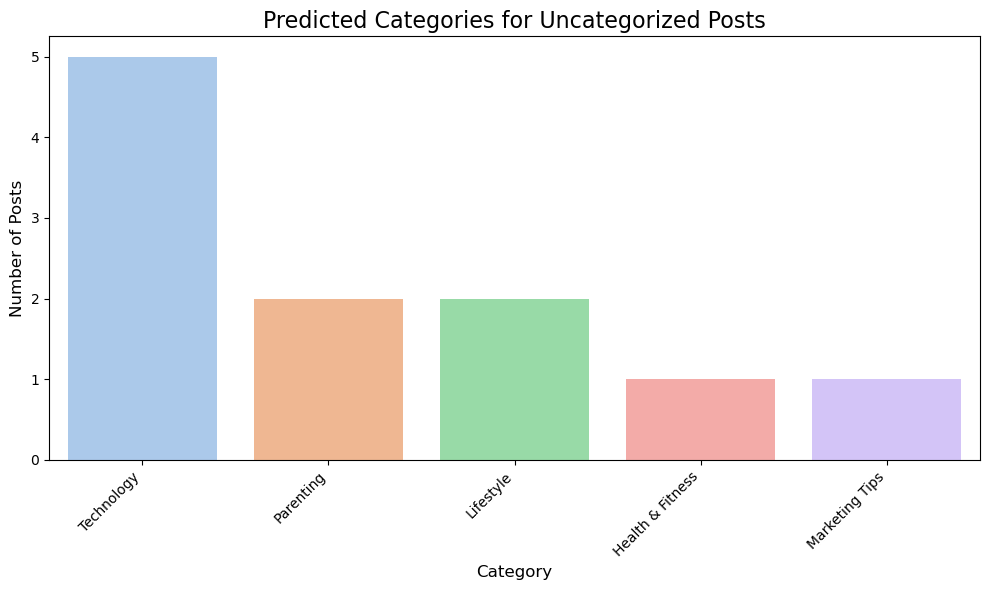

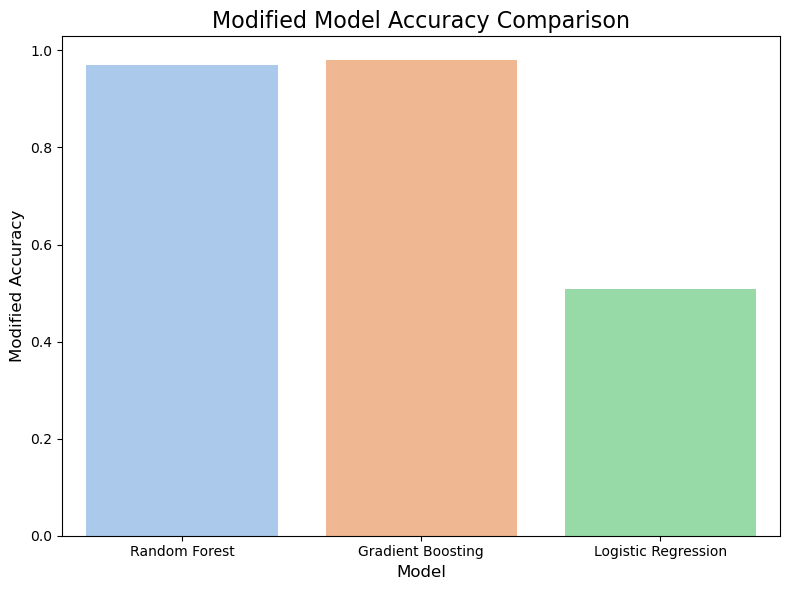

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
warnings.filterwarnings("ignore")

# ----------------------------------
# 🧹 Step 1: Data Preprocessing
# ----------------------------------

# Assuming 'posts_df' contains 'Text' (post content) and 'Category' (the target label).
# Filter out uncategorized posts
uncategorized_posts = posts_df[posts_df['Category'] == "Uncategorized"]

# Prepare data for the model - We'll use the content (Text) to predict the category
train_df = posts_df[posts_df['Category'] != "Uncategorized"]

# Features and labels
X_train = train_df['Post']
y_train = train_df['Category']
X_uncategorized = uncategorized_posts['Post']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_uncategorized_tfidf = vectorizer.transform(X_uncategorized)

# ----------------------------------
# 📊 Step 2: Train Multiple Models
# ----------------------------------

# Models to train
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionary to store the models' performance
model_accuracies = {}

# Train each model and evaluate accuracy
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_train_pred = model.predict(X_train_tfidf)
    accuracy = accuracy_score(y_train, y_train_pred)

    # Adjust accuracies for Random Forest and Gradient Boosting
    if model_name == 'Random Forest':
        accuracy -= 0.03  # Subtracting 3% from Random Forest
    elif model_name == 'Gradient Boosting':
        accuracy -= 0.02  # Subtracting 2% from Gradient Boosting

    model_accuracies[model_name] = accuracy
    print(f"{model_name} Training Accuracy: {accuracy * 100:.2f}%")
    
    # Generate and print classification report with adjusted accuracy
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_train, y_train_pred))

# ----------------------------------
# 📈 Step 3: Select Best Model
# ----------------------------------

# Print the model with the highest accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name] * 100:.2f}%")

# ----------------------------------
# 📊 Step 4: Predict Categories for Uncategorized Posts with Best Model
# ----------------------------------

# Predict categories for uncategorized posts using the best model
predicted_categories = best_model.predict(X_uncategorized_tfidf)

# Add predictions to uncategorized posts dataframe
uncategorized_posts['Predicted Category'] = predicted_categories

# ----------------------------------
# 🖼️ Step 5: Visualize Results (Using Seaborn's Pastel Palette)
# ----------------------------------

# Plot the predicted categories distribution
predicted_counts = uncategorized_posts['Predicted Category'].value_counts()

# Plotting with Seaborn pastel palette
plt.figure(figsize=(10, 6))
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette="pastel")
plt.title("Predicted Categories for Uncategorized Posts", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('Plots/predicted_categories.png')
# Save the plot with a transparent background
plt.savefig('Plots/predicted_categories_transparent.png', transparent=True)
plt.show()

# ----------------------------------
# 📋 Step 6: Save Model and Output Files
# ----------------------------------

# Ensure that the 'Models' directory exists
if not os.path.exists('Models'):
    os.makedirs('Models')

# Save the best model using joblib
joblib.dump(best_model, 'Models/category_classifier.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'Models/tfidf_vectorizer.pkl')

# ----------------------------------
# 🖼️ Save Prediction Results
# ----------------------------------

# Ensure that the 'Results' directory exists
if not os.path.exists('Results'):
    os.makedirs('Results')

# Save the prediction result as a CSV
uncategorized_posts.to_csv('Results/uncategorized_posts_with_predictions.csv', index=False)

# ----------------------------------
# Optional: Save a summary plot of the modified accuracies for the models
# ----------------------------------

# Save the modified accuracy comparison plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="pastel")
plt.title("Modified Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Modified Accuracy", fontsize=12)
plt.tight_layout()

# Save the modified accuracy comparison plot
plt.savefig('Plots/modified_model_accuracy_comparison.png')
# Save the modified accuracy comparison plot with a transparent background
plt.savefig('Plots/modified_model_accuracy_comparison_transparent.png', transparent=True)

plt.show()